# 予測する

In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import librosa
import librosa.feature
import librosa.display
import keras.backend as K

test_image = []

In [6]:
# モデルの読み込み
# カスタムオブジェクトを使っているので、custom_objectsを引数で指定する。
def normalize_y_pred(y_pred):
    return K.one_hot(K.argmax(y_pred), y_pred.shape[-1])

def class_true_positive(class_label, y_true, y_pred):
    y_pred = normalize_y_pred(y_pred)
    return K.cast(K.equal(y_true[:, class_label] + y_pred[:, class_label], 2),
                  K.floatx())

def true_positive(y_true, y_pred):
    y_pred = normalize_y_pred(y_pred)
    return K.cast(K.equal(y_true + y_pred, 2),
                  K.floatx())

# Precision (Macro)
def class_precision(class_label, y_true, y_pred):
    y_pred = normalize_y_pred(y_pred)
    return K.sum(class_true_positive(class_label, y_true, y_pred)) / (K.sum(y_pred[:, class_label]) + K.epsilon())

def macro_precision(y_true, y_pred):
    class_count = y_pred.shape[-1]
    return K.sum([class_precision(i, y_true, y_pred) for i in range(class_count)]) \
           / K.cast(class_count, K.floatx())

# Recall (Macro)
def class_recall(class_label, y_true, y_pred):
    return K.sum(class_true_positive(class_label, y_true, y_pred)) / (K.sum(y_true[:, class_label]) + K.epsilon())

def macro_recall(y_true, y_pred):
    class_count = y_pred.shape[-1]
    return K.sum([class_recall(i, y_true, y_pred) for i in range(class_count)]) \
           / K.cast(class_count, K.floatx())

model = keras.models.load_model("cnn_merspectrogram_02.h5", custom_objects={"macro_precision": macro_precision, "macro_recall": macro_recall})

In [52]:
# 音声ファイル読み込み
#file_path = "data/voice_datasets/healthy/voice_data_healthy_001.wav"
#file_path = "data/voice_datasets/healthy/voice_data_healthy_002.wav"
#file_path = "data/voice_datasets/disease/voice_data_bad_001.wav"
#file_path = "data/voice_datasets/disease/voice_data_bad_002.wav"
#file_path = "disease01.wav"
#file_path = "disease02.wav"
file_path = "disease03.wav"
#file_path = "healthy01.wav"
#file_path = "healthy02.wav"
y, sr = librosa.load(file_path, sr=44100)

In [53]:
# 短時間フーリエ変換
# 振幅スペクトログラムを算出
D = np.abs(librosa.stft(y)) # STFT
D_dB = librosa.amplitude_to_db(D, ref=np.max)

In [54]:
# メルスペクトログラムを算出
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.amplitude_to_db(S, ref=np.max)

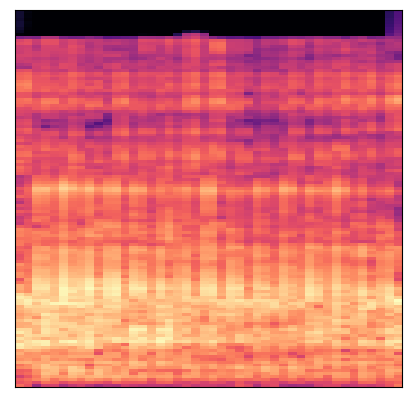

In [55]:
# 画像を一旦保存する
plt.figure(figsize=(5,5), dpi=100)
librosa.display.specshow(S_dB, sr=sr)
plt.savefig("tmp.jpg")

In [56]:
# テスト画像の読み込み
image_path = "tmp.jpg"
#image_path = "data/mer_spectrogram_images/disease/voice_data_bad_003.jpg"
X = np.array((Image.open(image_path).resize((224,224))))
test_image = np.array([X])

In [57]:
pred = model.predict(test_image)
class_name = ["healthy", "disease"]
print(pred) # 1枚目のテストデータの予測

print("Result:",class_name[np.argmax(pred)])

[[1. 0.]]
Result: healthy
